## Arctic Heat

**Flight Logs and IWG Files**

Fall 2018

Purpose: Plot Flight Logs and IWG files

In [21]:
import pandas as pd
import os
import datetime

In [22]:
logs_dir = '/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/Flight Logs/'
logs_file = [os.path.join(dp, f) for dp, dn,
   fn in os.walk(os.path.expanduser(logs_dir)) for f in fn if '.txt' in f]

#read the cleaned IWG files (only one header at the start, and saved as .txt files)
iwg_dir = '/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/IWG_data/'
iwg_file = [os.path.join(dp, f) for dp, dn,
   fn in os.walk(os.path.expanduser(iwg_dir)) for f in fn if '.txt' in f]


## Load and display contents of Flight Logs

In [23]:
dfs = {}
for i,filename in enumerate(logs_file):
    print(filename)
    dfs.update({i: pd.read_csv(filename, error_bad_lines=False)})



/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/Flight Logs/FlightLog20180529.txt
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/Flight Logs/FlightLog20180527.txt
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/Flight Logs/FlightLog20180525.txt
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/Flight Logs/FlightLog20180530.txt


b'Skipping line 6: expected 1 fields, saw 2\nSkipping line 13: expected 1 fields, saw 2\nSkipping line 14: expected 1 fields, saw 2\nSkipping line 17: expected 1 fields, saw 2\n'
b'Skipping line 12: expected 1 fields, saw 3\n'


In [24]:
dfs

{0:                            AH20180529 Flight Log
 0                         2033 Take off Kotzebue
 1             2049 Wind 4.8 m/s 095 T smooth sea
 2                    2133 BT away A1 - ch 12 dud
 3                      2137 BT away A1 - prg dud
 4                2141 BT away A1 - prg good data
 5      2144 Clouds under a/c 500 ft flight level
 6                  2203 BT away A2 prg good data
 7                  2231 BT away A3 prg good data
 8                2234 Clouds under a/c w/ breaks
 9   ---- Lidar power conditioner nf. reboot 2246
 10              2246 Clouds under a/c 800 ft asl
 11                     2303 BT away A4 ch 12 dud
 12                       2306 BT away A4 prg dud
 13                       2308 BT away A4 prg dud
 14                       2312 BT away A4 prg dud
 15                     2321 4500 ft clouds under
 16                0037 BT away A5 prg good data 
 17                      0037 sky clear and sunny
 18                 0042 Lidar on w 10 m/s 103 

## Load and display contents of cleaned IWG files

In [25]:
dfs = {}
for i,filename in enumerate(sorted(iwg_file)[9:]):
    print(filename)
    dfs.update({i: pd.read_csv(filename, error_bad_lines=False, parse_dates=['TIME'], index_col=['TIME'])})


/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/IWG_data/20180911_180610_IWG.clean.txt
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/IWG_data/20180912_010115_IWG.clean.txt
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/IWG_data/20180913_001202_IWG.clean.txt
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/IWG_data/20180913_200814_IWG.clean.txt
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/IWG_data/20180914_010132_IWG.clean.txt
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/IWG_data/20180914_200847_IWG.clean.txt


### Plot fligh paths

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cmocean

def make_map(projection=ccrs.PlateCarree(),figsize=(16, 16)):
    fig, ax = plt.subplots(figsize=figsize,
                           subplot_kw=dict(projection=projection))
    if projection == ccrs.PlateCarree():
        gl = ax.gridlines(draw_labels=True)
        gl.xlabels_top = gl.ylabels_right = False
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
    return fig, ax, plt

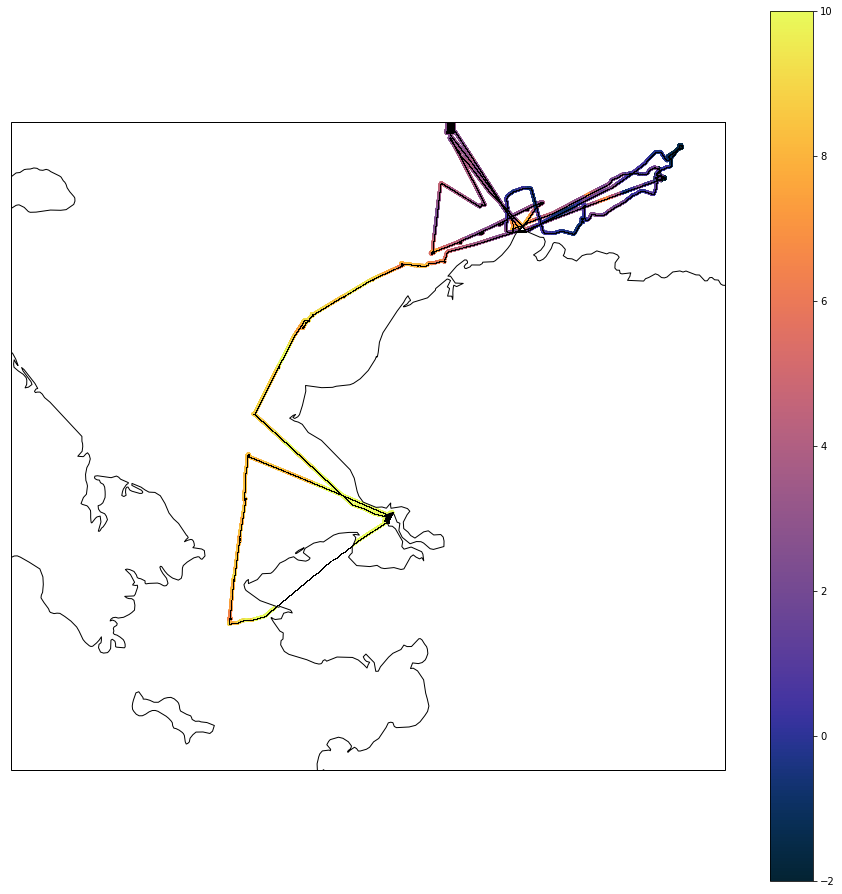

In [27]:
projection=ccrs.LambertConformal(central_longitude=-160.0)
transformation=ccrs.PlateCarree()

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')

dx = dy = 0.5
extent = [-176, -150, 62.5, 72.5]

fig,ax,plt = make_map(projection=projection)

for legs, df in dfs.items():
    ax.plot(df['LON'], df['LAT'], '+k', markersize=0.5, label=legs, transform=transformation)
    t = ax.scatter(df['LON'], df['LAT'], s=5,c=df.SST, cmap=cmocean.cm.thermal, vmin=-2, vmax=10, label=legs, transform=transformation)

plt.colorbar(t)
#leg = ax.legend()

ax.add_feature(land_50m)
ax.coastlines(resolution='50m')
ax.set_extent(extent)

see the [ArcticHeat_IWG_plot.ipynb](ArcticHeat_IWG_plot.ipynb) for more extensive plots using the gmt-python package

## From the cleaned Flight Log compilation file

An excel combined file of all flight logs and ops has been created with additional metadata referring to the location, time, depth and quality of XBT and AXCTD data.

Location of dropsonde events

In [28]:
fl=pd.read_excel('/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/Event_Log-all.xlsx',sheet_name='Fall')

### XBT and AXCTD Drop Locations

The map below has all drop locations plotted, with successful locations in black in the second plot

Text(0.5,1,'Good Sonde Drops')

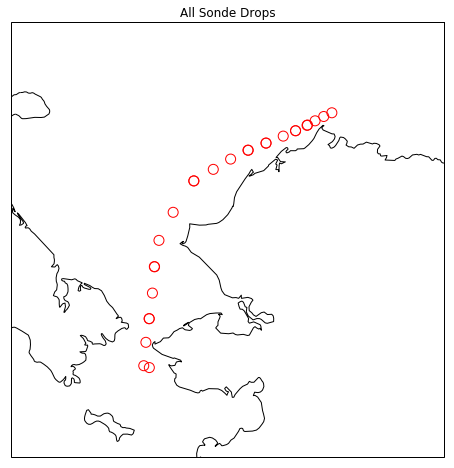

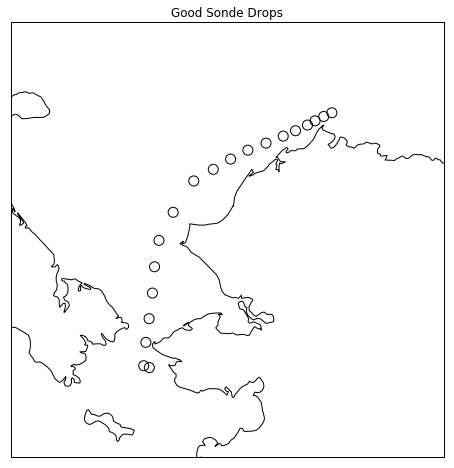

In [35]:
fig,ax,plt = make_map(projection=projection,figsize=(8,8))
extent = [-176, -150, 62.5, 73.5]

t = ax.scatter(fl['lon'], fl['lat'], s=100, facecolors='none', edgecolors='r', transform=transformation)

ax.add_feature(land_50m)
ax.coastlines(resolution='50m')
ax.set_extent(extent)
plt.title('All Sonde Drops')

fig,ax,plt = make_map(projection=projection,figsize=(8,8))
extent = [-176, -150, 62.5, 73.5]

t = ax.scatter(fl['lon'][fl['DataQuality'] == 'Good'], fl['lat'][fl['DataQuality'] == 'Good'],
               s=100, facecolors='none', edgecolors='k', transform=transformation)

ax.add_feature(land_50m)
ax.coastlines(resolution='50m')
ax.set_extent(extent)
plt.title('Good Sonde Drops')

### Each XBT was deployed over one of three legs

The entire extent allows a profile cross-section of the entire Chukchi basing from North to South

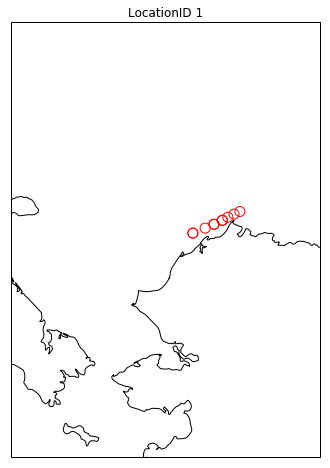

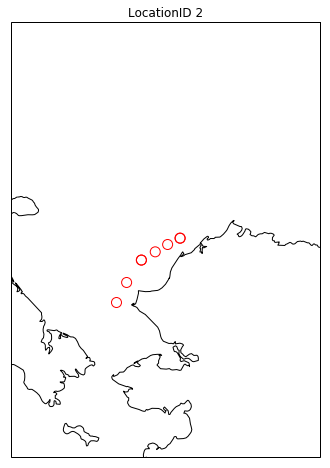

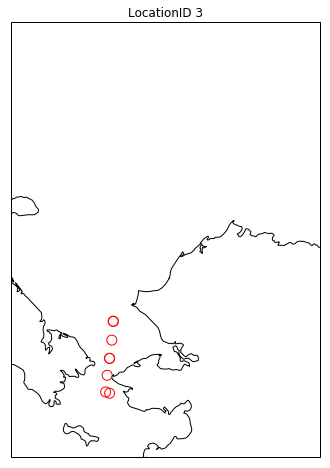

In [33]:
extent = [-176, -150, 62.5, 77.5]

for count in range(1,4):
    fig,ax,plt = make_map(projection=projection,figsize=(8,8))
    extent = [-176, -150, 62.5, 77.5]

    t = ax.scatter(fl['lon'][fl['LocationID'] == count], fl['lat'][fl['LocationID'] == count],
                   s=100, facecolors='none', color='r', transform=transformation)

    ax.add_feature(land_50m)
    ax.coastlines(resolution='50m')
    ax.set_extent(extent)
    plt.title('LocationID {}'.format(count))